<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
# load dataset:
from tensorflow.keras.datasets import boston_housing
# train, test:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


In [48]:
# normalize data:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
X = MinMax.fit_transform(train_data)
X_test = MinMax.fit_transform(test_data)

y = train_targets
y_test = test_targets

In [49]:
X.shape

(404, 13)

In [19]:
# import model and layers we'll need:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

np.random.seed(812)

In [76]:
# instantiate model:
model = Sequential(name='Boston_Housing_1st_Attempt')

# add layers to model:
model.add(Dense(50, input_dim=13, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
# no activation function for output layer since regression problem:
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# inspect our new architecture
model.summary()

Model: "Boston_Housing_1st_Attempt"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 50)                700       
_________________________________________________________________
dense_61 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_62 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 51        
Total params: 5,851
Trainable params: 5,851
Non-trainable params: 0
_________________________________________________________________


In [77]:
# fit the model:
history = model.fit(X,y, epochs=50, verbose=False, validation_split=0, validation_data=(X_test, y_test))

In [78]:
model.evaluate(X,y)

404/404 [==============================] - 0s 25us/sample - loss: 14.8909


14.89094362164488

In [79]:
# use history object to visualize train vs test losses:
history.history.keys()

dict_keys(['loss', 'val_loss'])

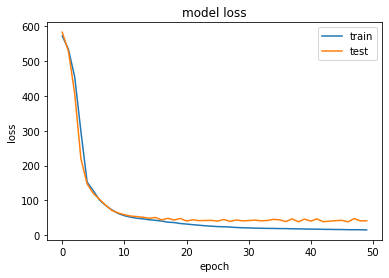

In [81]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [82]:
# compare with linear regression:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
from sklearn.metrics import mean_squared_error
print('training data linear regression:', mean_squared_error(model2.predict(X), y))
print('training data neural network:', mean_squared_error(model.predict(X), y))

training data linear regression: 22.00480083834814
training data neural network: 14.890943340614426


The neural network's MSE was 14.89 and the linear regression's was 22.00 on the training data so in this case the neural network model did better, now let's see on the test data:

In [88]:
print('test data linear regression:', mean_squared_error(model2.predict(X_test), y_test))
print('test data neural network:', mean_squared_error(model.predict(X_test), y_test))

test data linear regression: 40.60145446671504
test data neural network: 41.4603196042401


For test data, they were about even. Since the training data performed better on both models there may have been overfitting.

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [21]:
# load the data:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import keras

In [22]:
# train and test sets:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [23]:
# input image dimensions:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

In [24]:
# normalize data:
x_train = x_train / 255
x_test = x_test / 255

In [66]:
# make outputs categorical:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_test.shape

(10000, 10, 10, 10)

In [53]:
# instantiate model:
model2 = Sequential(name='MNIST_Fashion_1st_Attempt')

# add layers to model:
model2.add(Dense(100, input_dim=784, activation="relu"))
model2.add(Dense(100, activation="relu"))
model2.add(Dense(100, activation="relu"))
# softmax activation function since multi-class classification problem:
model2.add(Dense(10, activation="softmax"))

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# inspect our new architecture
model2.summary()

Model: "MNIST_Fashion_1st_Attempt"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [54]:
# fit the model:
history = model2.fit(x_train,y_train, epochs=50, verbose=True, validation_split=0, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4931 - acc: 0.8212 - val_loss: 0.4117 - val_acc: 0.8543
Epoch 2/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3661 - acc: 0.8665 - val_loss: 0.4020 - val_acc: 0.8508
Epoch 3/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3336 - acc: 0.8765 - val_loss: 0.3660 - val_acc: 0.8689
Epoch 4/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3099 - acc: 0.8847 - val_loss: 0.3517 - val_acc: 0.8716
Epoch 5/50
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2945 - acc: 0.8904 - val_loss: 0.3622 - val_acc: 0.8700
Epoch 6/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2774 - acc: 0.8951 - val_loss: 0.3564 - val_acc: 0.8731
Epoch 7/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2689 - acc: 0.8989 - val_loss: 0.

In [55]:
model2.evaluate(x_train,y_train)

60000/60000 [==============================] - 2s 26us/sample - loss: 0.1253 - acc: 0.9540


[0.12528063587676733, 0.9539833]

In [56]:
model2.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.6090 - acc: 0.8816


[0.6089623772591353, 0.8816]

In [57]:
# use history object to visualize train vs test losses:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

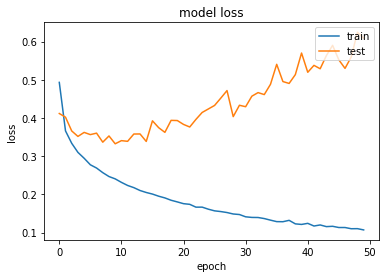

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

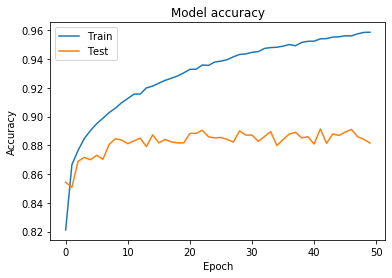

In [59]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.